In [1]:
import numpy as np
import matplotlib.pyplot as plt

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
        -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
         2.75935511]),
 <BarContainer object of 10 artists>)

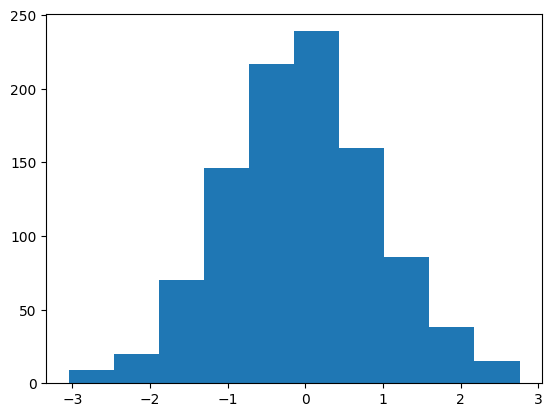

In [5]:
# plt.hist
np.random.seed(0)
data = np.random.randn(1000)
plt.hist(data)

(array([  6.,  23.,  86., 174., 245., 234., 135.,  73.,  20.,   4.]),
 array([-2.99461286, -2.3780541 , -1.76149533, -1.14493657, -0.52837781,
         0.08818096,  0.70473972,  1.32129848,  1.93785725,  2.55441601,
         3.17097477]),
 [<matplotlib.patches.Polygon at 0x219cb0f30b0>])

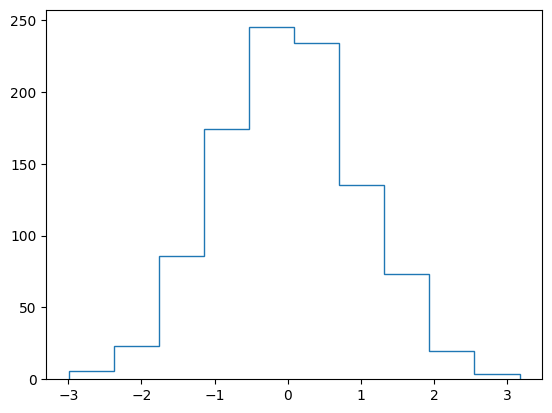

In [6]:
# histtype='step'
data = np.random.randn(1000)
plt.hist(data, histtype='step')

(array([ 2.,  1.,  3.,  1.,  8., 14., 27., 31., 28., 55., 62., 57., 77.,
        72., 96., 90., 71., 73., 56., 49., 30., 31., 25., 17.,  6., 10.,
         4.,  3.,  0.,  1.]),
 array([-2.99461286, -2.78909327, -2.58357368, -2.3780541 , -2.17253451,
        -1.96701492, -1.76149533, -1.55597575, -1.35045616, -1.14493657,
        -0.93941698, -0.73389739, -0.52837781, -0.32285822, -0.11733863,
         0.08818096,  0.29370054,  0.49922013,  0.70473972,  0.91025931,
         1.1157789 ,  1.32129848,  1.52681807,  1.73233766,  1.93785725,
         2.14337683,  2.34889642,  2.55441601,  2.7599356 ,  2.96545519,
         3.17097477]),
 [<matplotlib.patches.Polygon at 0x219cc2d3ec0>])

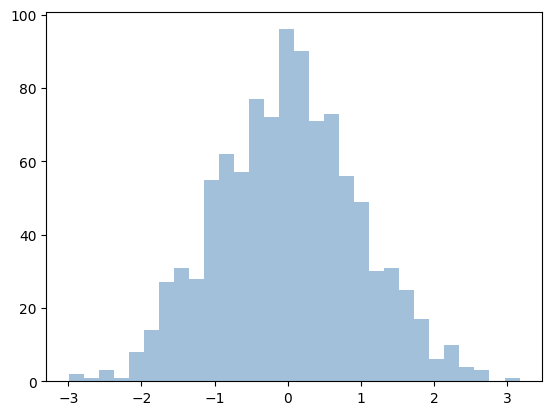

In [7]:
# stepfilled, with alpha
plt.hist(data, bins=30, alpha=0.5,
    histtype='stepfilled', color='steelblue',
    edgecolor='none')

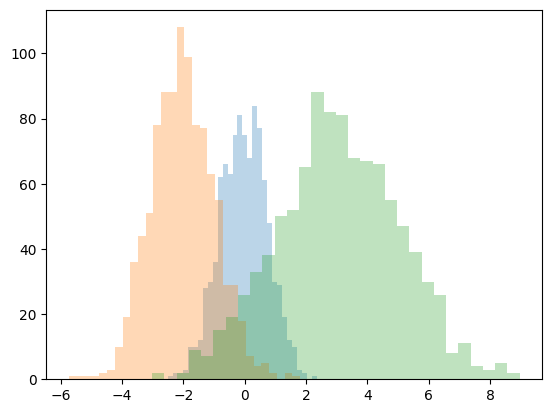

In [8]:
# multiple histograms
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=30)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);


In [10]:
# binning
counts, bin_edges = np.histogram(data, bins=5)
bin_starts = bin_edges[:-1]
bin_ends = bin_edges[1:]
import pandas as pd
df = pd.DataFrame({'start': bin_starts, 'end': bin_ends, 'count': counts})
df


,start,end,count
0,-2.994613,-1.761495,29
1,-1.761495,-0.528378,260
2,-0.528378,0.704740,479
3,0.704740,1.937857,208
4,1.937857,3.170975,24


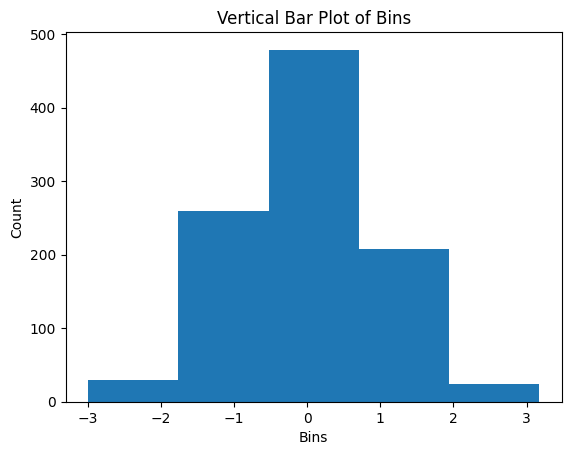

In [11]:
plt.bar(df['start'], df['count'], width=df['end'] - df['start'], align='edge')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.title('Vertical Bar Plot of Bins')
plt.show()


# 2d

In [27]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T


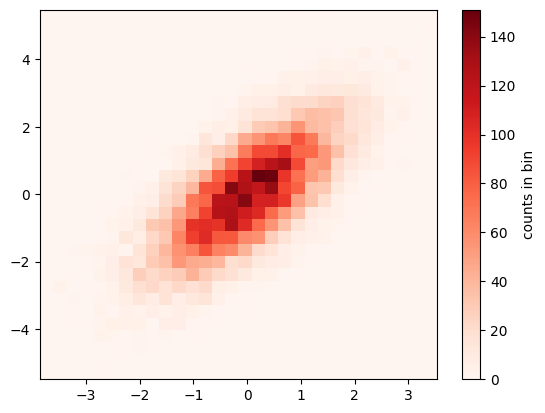

In [34]:
plt.hist2d(x, y, bins=30, cmap='Reds')
cb = plt.colorbar()
cb.set_label('counts in bin')

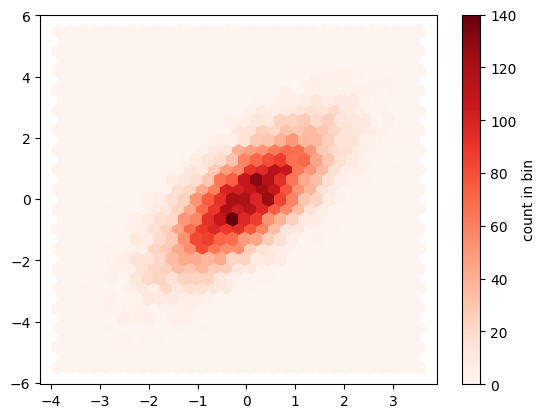

In [36]:
plt.hexbin(x, y, gridsize=30, cmap='Reds')
cb = plt.colorbar(label='count in bin')

In [35]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

# KDE

In [39]:
from scipy.stats import gaussian_kde
# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)
# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

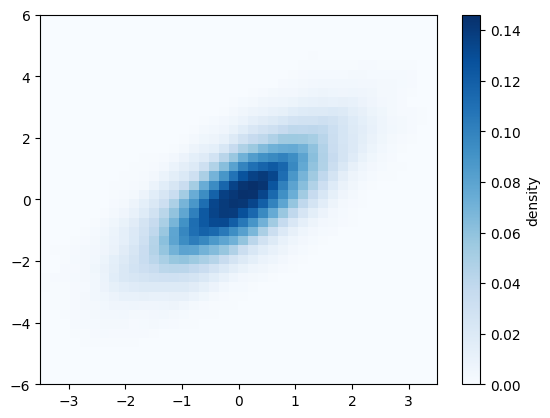

In [40]:
# Plot the result as an image
plt.imshow(
    Z.reshape(Xgrid.shape),origin='lower', aspect='auto',
    extent=[-3.5, 3.5, -6, 6],
    cmap='Blues'
)
cb = plt.colorbar()
cb.set_label("density")

<a list of 7 text.Text objects>

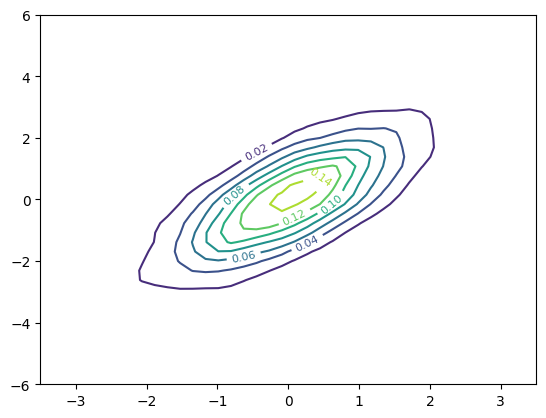

In [44]:
# Plot the result as a contour plot
contours = plt.contour(Xgrid, Ygrid, Z.reshape(Xgrid.shape))
plt.clabel(contours, inline=True, fontsize=8)

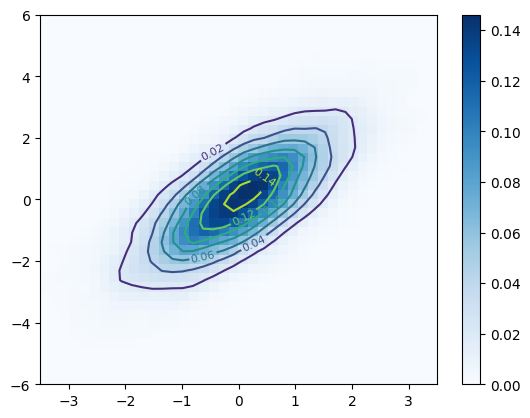

In [47]:
# combine
contours = plt.contour(Xgrid, Ygrid, Z.reshape(Xgrid.shape))
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(
    Z.reshape(Xgrid.shape),origin='lower', aspect='auto',
    extent=[-3.5, 3.5, -6, 6],
    cmap='Blues'
)
plt.colorbar()